In [46]:
import sys
import pandas as pd 
import numpy as np 
import os 
import seaborn as sns 
import matplotlib.pyplot as plt
import librosa 
import librosa.display 
from IPython.display import Audio 
import warnings
warnings.filterwarnings('ignore')

In [47]:
paths = []
labels = []
for dirname, _, filenames in os.walk('/home/ruchi/SpeechEmotionRecognition/data'):
    for filename in filenames:
        paths.append(os.path.join(dirname,filename))
        label = filename.split('_')[-1]
        label = label.split('.')[0]
        labels.append(label)
print('Loading of the Dataset is done')
        

Loading of the Dataset is done


In [48]:
paths[:5]


['/home/ruchi/SpeechEmotionRecognition/data/OAF_Sad/OAF_wife_sad.wav',
 '/home/ruchi/SpeechEmotionRecognition/data/OAF_Sad/OAF_mop_sad.wav',
 '/home/ruchi/SpeechEmotionRecognition/data/OAF_Sad/OAF_mouse_sad.wav',
 '/home/ruchi/SpeechEmotionRecognition/data/OAF_Sad/OAF_keg_sad.wav',
 '/home/ruchi/SpeechEmotionRecognition/data/OAF_Sad/OAF_rough_sad.wav']

In [49]:
labels[:5]


['sad', 'sad', 'sad', 'sad', 'sad']

In [50]:
df = pd.DataFrame()
df['speech'] = paths 
df['label'] = labels
df.head

<bound method NDFrame.head of                                                  speech    label
0     /home/ruchi/SpeechEmotionRecognition/data/OAF_...      sad
1     /home/ruchi/SpeechEmotionRecognition/data/OAF_...      sad
2     /home/ruchi/SpeechEmotionRecognition/data/OAF_...      sad
3     /home/ruchi/SpeechEmotionRecognition/data/OAF_...      sad
4     /home/ruchi/SpeechEmotionRecognition/data/OAF_...      sad
...                                                 ...      ...
5595  /home/ruchi/SpeechEmotionRecognition/data/YAF_...  neutral
5596  /home/ruchi/SpeechEmotionRecognition/data/YAF_...  neutral
5597  /home/ruchi/SpeechEmotionRecognition/data/YAF_...  neutral
5598  /home/ruchi/SpeechEmotionRecognition/data/YAF_...  neutral
5599  /home/ruchi/SpeechEmotionRecognition/data/YAF_...  neutral

[5600 rows x 2 columns]>

In [51]:
df['label'].value_counts()

happy      800
sad        800
fear       800
neutral    800
disgust    800
angry      800
ps         800
Name: label, dtype: int64

<AxesSubplot:xlabel='label', ylabel='count'>

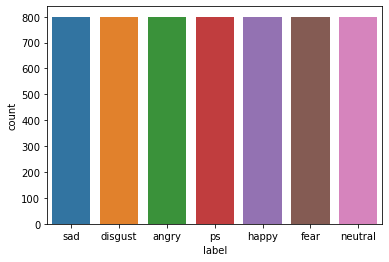

In [52]:
#eda
sns.countplot(df['label'])

In [53]:
def waveplot(data, sr, emotion):
    plt.figure(figsize=(10,4))
    plt.title(emotion, size=20)
    librosa.display.waveplot(data, sr=sr)
    plt.show()
    
def spectogram(data, sr, emotion):
    x = librosa.stft(data)
    xdb = librosa.amplitude_to_db(abs(x))
    plt.figure(figsize=(11,4))
    plt.title(emotion, size=20)
    librosa.display.specshow(xdb, sr=sr, x_axis='time', y_axis='hz')
    plt.colorbar()

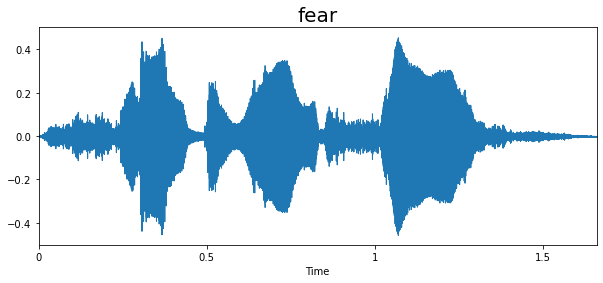

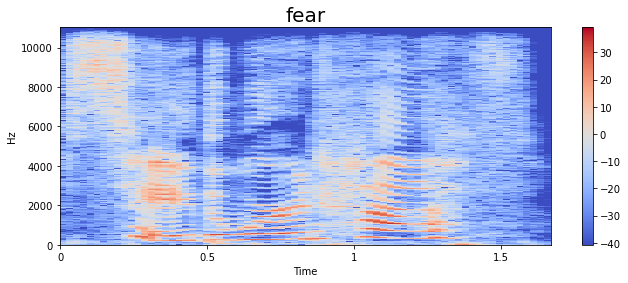

In [54]:
emotion = 'fear'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

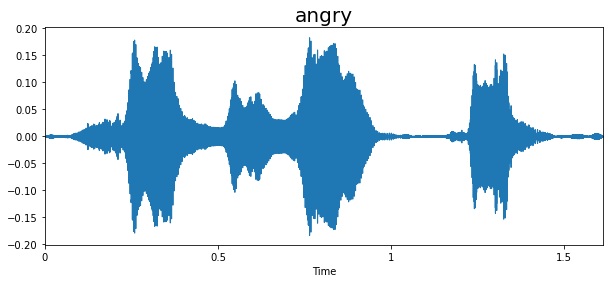

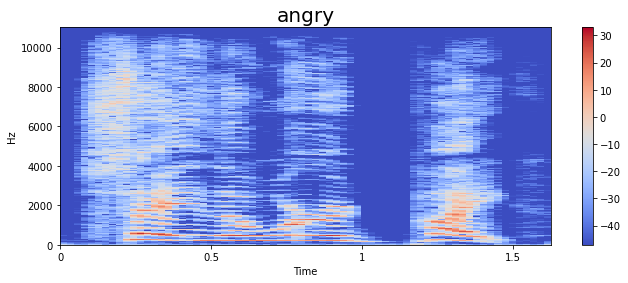

In [55]:
emotion = 'angry'
path = np.array(df['speech'][df['label']==emotion])[1]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

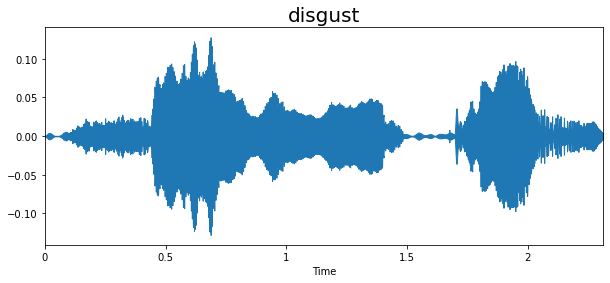

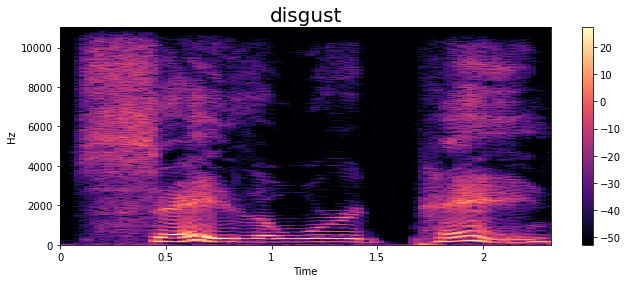

In [56]:
emotion = 'disgust'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

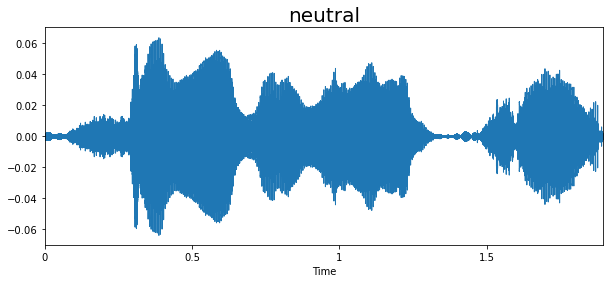

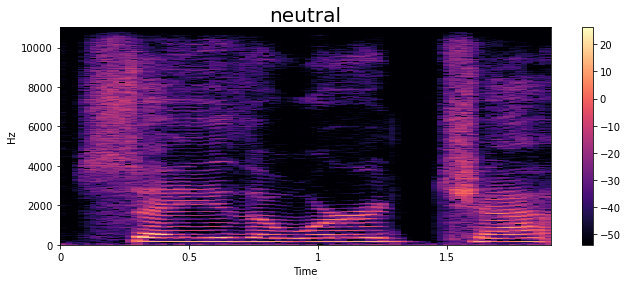

In [57]:
emotion = 'neutral'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

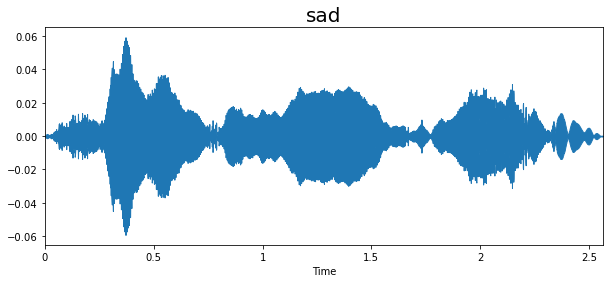

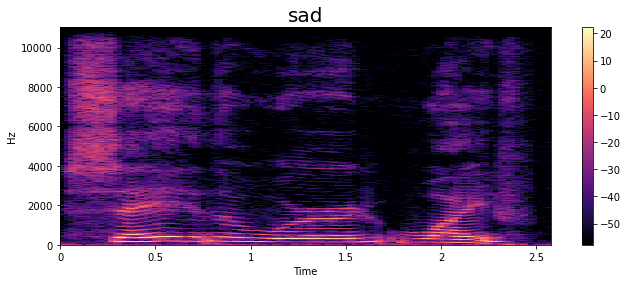

In [58]:
emotion = 'sad'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

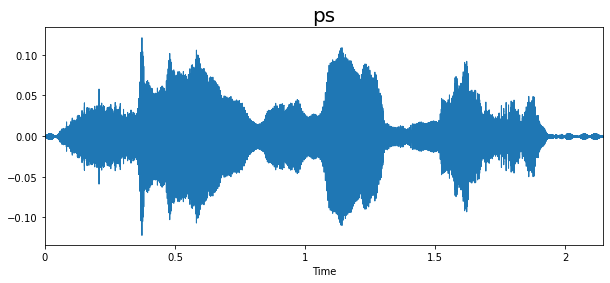

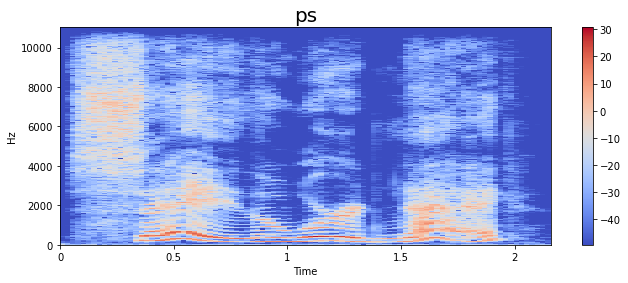

In [59]:
emotion = 'ps'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

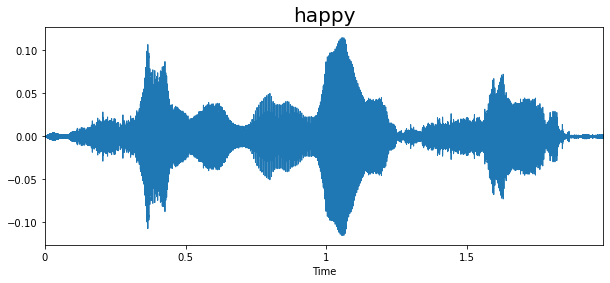

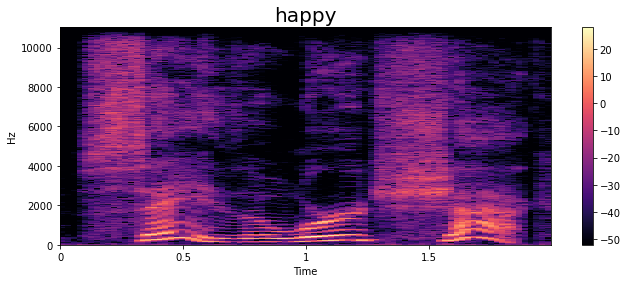

In [60]:
emotion = 'happy'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

In [61]:
#feature extraction 
def extract_mfcc(filename):
    y, sr = librosa.load(filename, duration=3, offset=0.5)
    mfcc = np.mean(librosa.feature.mfcc(y=y, sr=sr, n_mfcc=40).T, axis=0)
    return mfcc


In [62]:
extract_mfcc(df['speech'][0])

array([-5.67949036e+02,  1.09955345e+02,  3.28762779e+01,  2.03323307e+01,
        2.60238075e+01,  1.56354628e+01, -1.13268929e+01, -1.00074720e+01,
       -1.92367210e+01,  1.19272685e+00, -9.76484394e+00,  4.00783634e+00,
       -8.97094309e-01,  3.39844155e+00, -1.65735173e+00,  7.35947609e-01,
        2.89923310e-01,  2.66685581e+00,  3.10733509e+00, -6.83231640e+00,
        3.87887430e+00,  7.12500811e-02, -4.87467718e+00,  2.03597879e+00,
       -9.36762714e+00,  3.72000146e+00, -4.17633343e+00,  1.06570339e+00,
       -3.57044148e+00,  3.25441337e+00,  8.81473482e-01,  9.12940311e+00,
        3.65692210e+00,  3.49611950e+00,  5.77028036e+00,  2.94641209e+00,
        5.02069855e+00,  9.52600765e+00,  1.03080969e+01,  1.64876862e+01],
      dtype=float32)

In [63]:
X_mfcc = df['speech'].apply(lambda x: extract_mfcc(x))

In [64]:
X_mfcc

0       [-567.94904, 109.955345, 32.876278, 20.33233, ...
1       [-531.4691, 113.62336, 35.634453, 6.2501173, 1...
2       [-501.53146, 99.157776, 31.031439, 6.53638, 14...
3       [-520.8595, 85.37673, 22.234613, 22.073341, 28...
4       [-534.5305, 107.11594, 25.72965, 1.0193372, 16...
                              ...                        
5595    [-400.7962, 98.91321, -6.064706, 27.699873, 1....
5596    [-402.0148, 91.52101, -13.62645, 30.709028, 3....
5597    [-420.86322, 80.439674, -18.918367, 11.726575,...
5598    [-446.43042, 118.64128, 5.9527216, 8.438167, -...
5599    [-438.18265, 119.07827, -3.9581642, 14.740119,...
Name: speech, Length: 5600, dtype: object

In [65]:
X = [x for x in X_mfcc]
X = np.array(X)
X.shape

(5600, 40)

In [66]:
## input split
X = np.expand_dims(X, -1)
X.shape

(5600, 40, 1)

In [67]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder()
y = enc.fit_transform(df[['label']])

In [68]:
y = y.toarray()

In [69]:
y.shape

(5600, 7)

In [70]:
#lstm model 

from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout

model = Sequential([
    LSTM(128, return_sequences=False, input_shape=(40,1)),
    Dense(64, activation='relu'),
    Dropout(0.4),
    Dense(32, activation='relu'),
    Dropout(0.4),
    Dense(7, activation='softmax')
])

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 128)               66560     
                                                                 
 dense_3 (Dense)             (None, 64)                8256      
                                                                 
 dropout_2 (Dropout)         (None, 64)                0         
                                                                 
 dense_4 (Dense)             (None, 32)                2080      
                                                                 
 dropout_3 (Dropout)         (None, 32)                0         
                                                                 
 dense_5 (Dense)             (None, 7)                 231       
                                                                 
Total params: 77,127
Trainable params: 77,127
Non-trai

In [71]:
history = model.fit(X, y, validation_split=0.2, epochs=50, batch_size=256)

Epoch 1/50
18/18 [==============================] - 4s 136ms/step - loss: 1.8132 - accuracy: 0.2935 - val_loss: 2.0903 - val_accuracy: 0.2429
Epoch 2/50
18/18 [==============================] - 2s 93ms/step - loss: 1.3899 - accuracy: 0.4949 - val_loss: 2.0316 - val_accuracy: 0.3643
Epoch 3/50
18/18 [==============================] - 2s 93ms/step - loss: 1.0051 - accuracy: 0.6299 - val_loss: 2.5070 - val_accuracy: 0.3804
Epoch 4/50
18/18 [==============================] - 2s 93ms/step - loss: 0.7149 - accuracy: 0.7578 - val_loss: 2.7236 - val_accuracy: 0.3688
Epoch 5/50
18/18 [==============================] - 2s 95ms/step - loss: 0.4820 - accuracy: 0.8464 - val_loss: 3.1187 - val_accuracy: 0.4455
Epoch 6/50
18/18 [==============================] - 2s 98ms/step - loss: 0.3413 - accuracy: 0.8964 - val_loss: 3.1359 - val_accuracy: 0.5464
Epoch 7/50
18/18 [==============================] - 2s 95ms/step - loss: 0.2656 - accuracy: 0.9187 - val_loss: 2.7427 - val_accuracy: 0.5366
Epoch 8/50
1

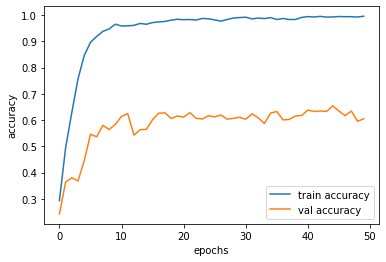

In [72]:
epochs = list(range(50))
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, label='train accuracy')
plt.plot(epochs, val_acc, label='val accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()


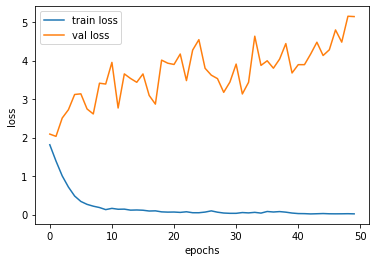

In [73]:
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.plot(epochs, loss, label='train loss')
plt.plot(epochs, val_loss, label='val loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [74]:
model.save('EmotionDetection.model')

INFO:tensorflow:Assets written to: EmotionDetection.model/assets


INFO:tensorflow:Assets written to: EmotionDetection.model/assets
